In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas_datareader as pdr
from scipy import stats
from scipy.stats import norm

rcParams['figure.figsize'] = 20, 6
sns.set()

In [84]:
amzn = pdr.get_data_yahoo('AMZN')

In [85]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-02-21 to 2022-02-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   int64  
 5   Adj Close  1259 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [86]:
amzn.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-11,3180.000000,3054.679932,3162.689941,3065.870117,3851600,3065.870117
2022-02-14,3168.969971,3033.000000,3035.020020,3103.340088,4022000,3103.340088
2022-02-15,3160.139893,3092.750000,3152.110107,3130.209961,2848500,3130.209961
2022-02-16,3176.679932,3094.689941,3115.810059,3162.010010,2635200,3162.010010
2022-02-17,3206.975098,3090.000000,3162.919922,3093.050049,3065859,3093.050049


In [87]:
amzn_return = round(np.log(amzn.Close).diff() * 100, 2)
amzn_return.dropna(inplace = True)
amzn_return.head()

Date
2017-02-22   -0.10
2017-02-23   -0.40
2017-02-24   -0.82
2017-02-27    0.40
2017-02-28   -0.43
Name: Close, dtype: float64

In [88]:
# amzn_return = pd.DataFrame(amzn_return)

In [89]:
amzn_return

Date
2017-02-22   -0.10
2017-02-23   -0.40
2017-02-24   -0.82
2017-02-27    0.40
2017-02-28   -0.43
              ... 
2022-02-11   -3.66
2022-02-14    1.21
2022-02-15    0.86
2022-02-16    1.01
2022-02-17   -2.21
Name: Close, Length: 1258, dtype: float64

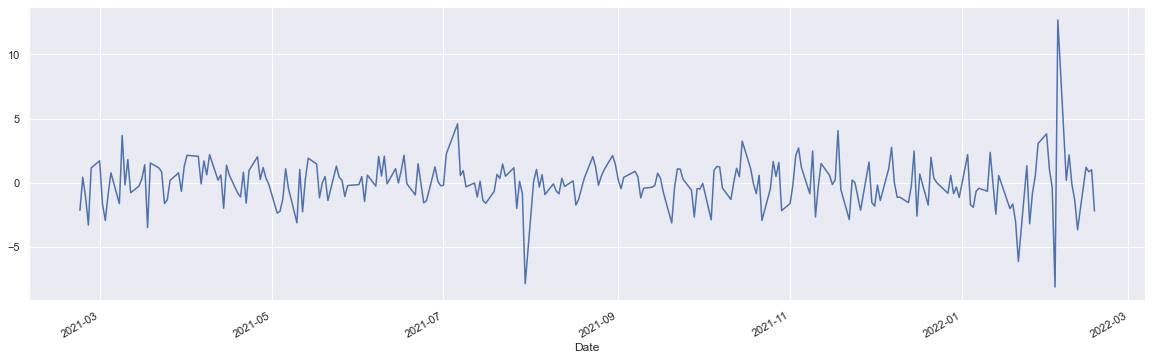

In [90]:
amzn_return[-252:].plot();

In [91]:
amzn_return.describe()

count    1258.000000
mean        0.102099
std         1.919449
min        -8.250000
25%        -0.760000
50%         0.135000
75%         1.060000
max        12.690000
Name: Close, dtype: float64

In [92]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5

In [93]:
x = norm.rvs(mean, std, n)

In [94]:
stats.describe(x)

DescribeResult(nobs=1258, minmax=(-5.848101979445765, 5.939053589317826), mean=0.21006912515609014, variance=3.558985740953896, skewness=-0.022749775556028116, kurtosis=0.0302613882310534)

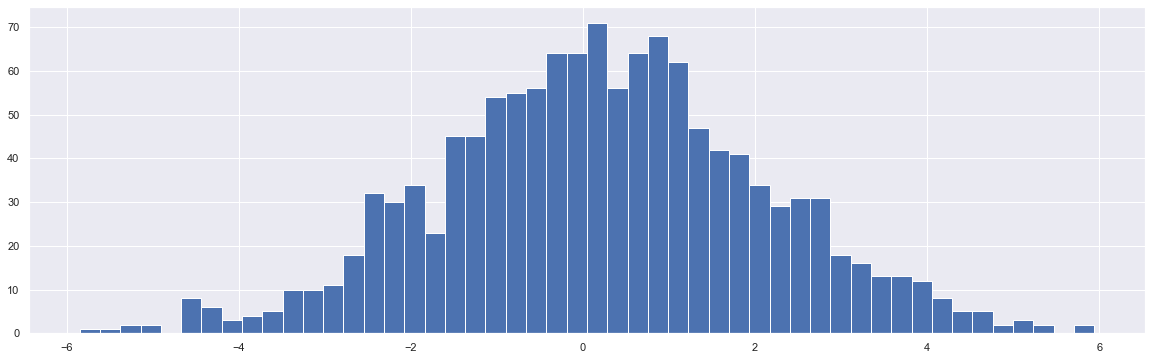

In [95]:
plt.hist(x, bins=50);

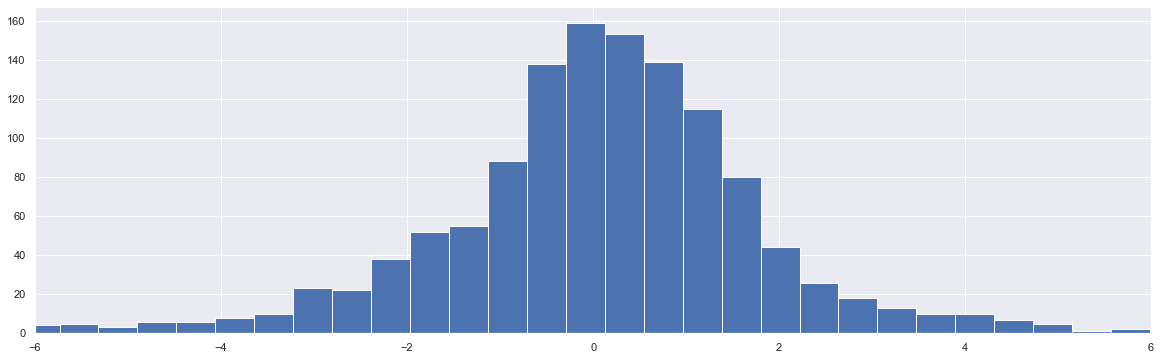

In [96]:
plt.hist(amzn_return, bins = 50)
plt.xlim(-6,6);

In [97]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:             0.32          0.7492
AMZN:         12.24          0.0000


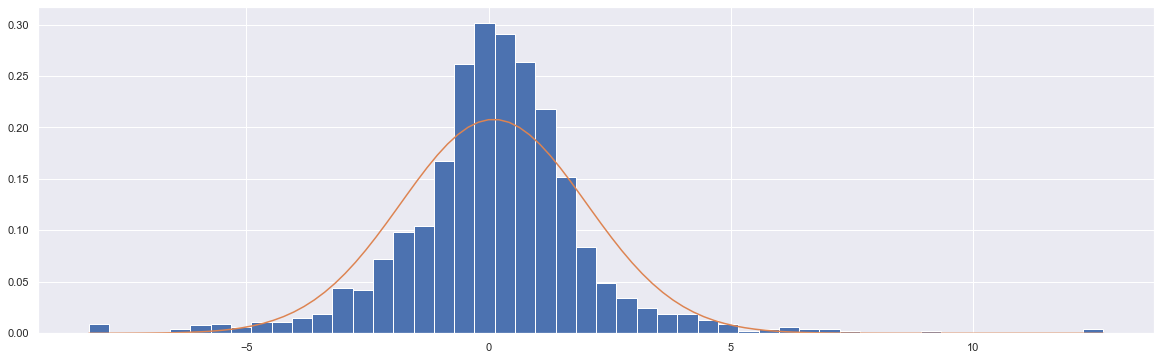

In [98]:
plt.hist(amzn_return, bins = 50, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std));

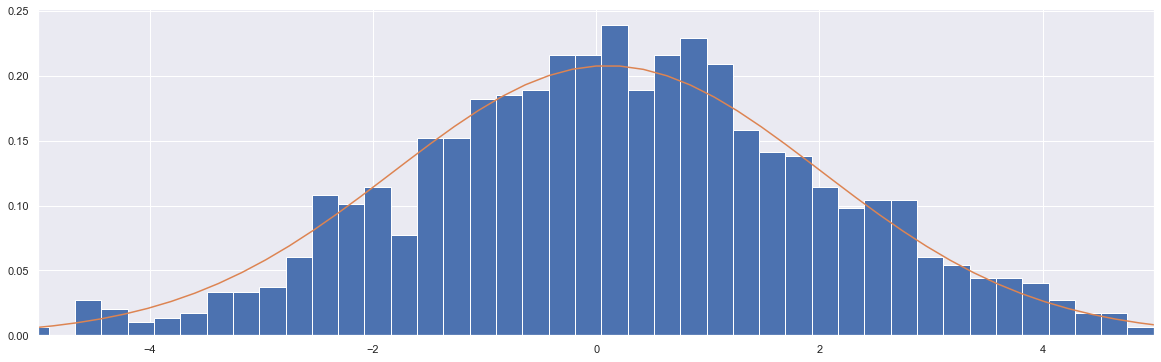

In [99]:
# comparação com distribuição da ação
plt.hist(x, bins =50, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-5,5);

In [100]:
# hipotese de teste 
stats.ttest_1samp(amzn_return.sample(252), 0, alternative='two-sided')

Ttest_1sampResult(statistic=-0.4618129534262761, pvalue=0.6446154602748524)

In [101]:
amzn_close = pd.DataFrame(amzn.Close, columns= ['Close'])
amzn_close['lag_1'] = amzn_close.Close.shift(1)
amzn_close['lag_2'] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close.head()

,Close,lag_1,lag_2
Date,,,
2017-02-23,852.190002,855.609985,856.440002
2017-02-24,845.239990,852.190002,855.609985
2017-02-27,848.640015,845.239990,852.190002
2017-02-28,845.039978,848.640015,845.239990
2017-03-01,853.080017,845.039978,848.640015


In [102]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close.Close, rcond=None)[0]

In [103]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)

In [104]:
amzn_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2017-02-23,852.190002,855.609985,856.440002,856.086816
2017-02-24,845.239990,852.190002,855.609985,852.791441
2017-02-27,848.640015,845.239990,852.190002,846.010098
2017-02-28,845.039978,848.640015,845.239990,848.906928
2017-03-01,853.080017,845.039978,848.640015,845.646555


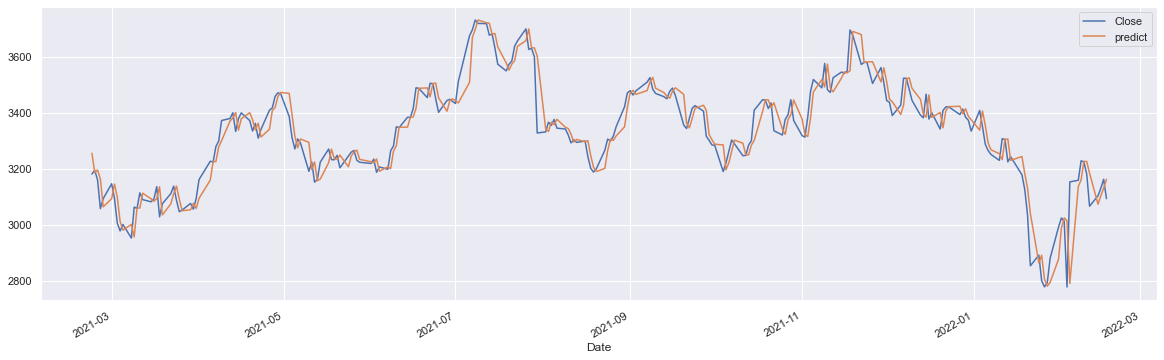

In [105]:
amzn_close.iloc[-252:][['Close', 'predict']].plot();